<a href="https://colab.research.google.com/github/SafaaFathii/Numerical-Optimization-GD/blob/main/notebooks/Practical_Session_3_Momentum_NAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
df = pd.DataFrame({"X": X})
np.random.shuffle(df["X"])
df["Y"] = -1 * df["X"] + 2
df["YPredict"] = ""
df

C:\Users\fathy\AppData\Local\Temp\ipykernel_4672\3121986680.py:3: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(df["X"])


,X,Y,YPredict
0,19.183673,-17.183673,
1,7.346939,-5.346939,
2,11.836735,-9.836735,
3,13.877551,-11.877551,
4,2.040816,-0.040816,
5,13.469388,-11.469388,
6,17.142857,-15.142857,
7,7.755102,-5.755102,
8,4.897959,-2.897959,
9,19.591837,-17.591837,


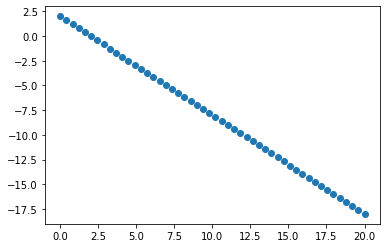

In [ ]:
plt.scatter(df["X"],df["Y"])
plt.show()

#### Plot your data points. 

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

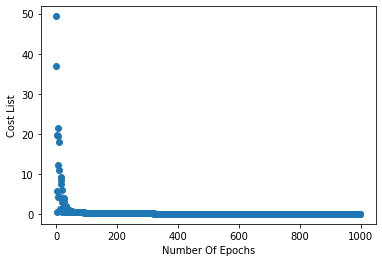

In [ ]:
def Hypo(theta_0,theta_1):
    df["YPredict"] = theta_0 + theta_1 * df["X"]
def CostFunc():
    sumii = sum(np.power(df["YPredict"]-df["Y"] , 2))
    totalCost = sumii/(2*df.shape[0])
    return totalCost
def Gradient_Theta():
    G_Theta_0 = sum(df["YPredict"]-df["Y"])/df.shape[0]
    G_Theta_1 = sum((df["YPredict"] - df["Y"])*df["X"])/df.shape[0]
    return G_Theta_0,G_Theta_1
def UpdateParameters(theta_0,theta_1,Vd_theta_0,Vd_theta_1):
    theta_0 -= Vd_theta_0
    theta_1 -= Vd_theta_1
    return theta_0,theta_1
theta_0 = 0
theta_1 = 0
alpha = 0.001
gamma = 0.9
costList = []
theta_0_List = []
theta_1_List = []
Vd_theta_0 = 0
Vd_theta_1 = 0
epoch = 0
for i in range(1000):
    Hypo(theta_0,theta_1)
    theta_0_List.append(theta_0)
    theta_1_List.append(theta_1)
    total_Cost = CostFunc()
    costList.append(total_Cost)
    G_theta_0,G_Theta_1 = Gradient_Theta()
    Vd_theta_0 = gamma * Vd_theta_0 +  alpha * G_theta_0
    Vd_theta_1 = gamma * Vd_theta_1 +  alpha * G_Theta_1
    theta_0,theta_1=UpdateParameters(theta_0,theta_1,Vd_theta_0,Vd_theta_1)
plt.scatter(range(1000),costList)
plt.xlabel("Number Of Epochs")
plt.ylabel("Cost List")
plt.show()



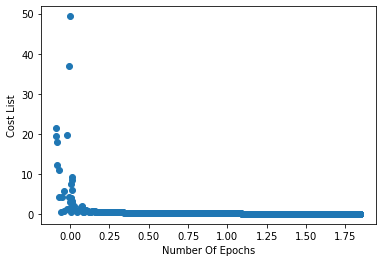

In [ ]:
plt.scatter(theta_0_List,costList)
plt.xlabel("Number Of Epochs")
plt.ylabel("Cost List")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df["Y"], df["YPredict"]))


0.9998256724267002


#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

C:\Users\fathy\AppData\Local\Temp\ipykernel_4672\1087686862.py:10: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(df["X"])


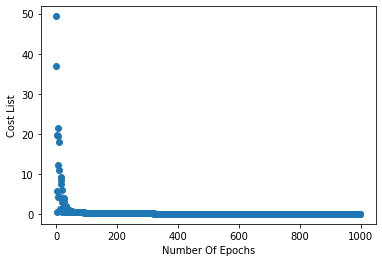

In [ ]:
def Hypo(theta_0,theta_1):
    df["YPredict"] = theta_0 + theta_1 * df["X"]
def CostFunc():
    sumii = sum(np.power(df["YPredict"]-df["Y"] , 2))
    totalCost = sumii/(2*df.shape[0])
    return totalCost

X = np.linspace(0,20)
df = pd.DataFrame({"X": X})
np.random.shuffle(df["X"])
df["Y"] = -1 * df["X"] + 2
df["YPredict"] = ""
theta_0 = 0
theta_1 = 0
alpha = 0.001
gamma = 0.9
costList = []
theta_0_List = []
theta_1_List = []
Vd_theta_0 = 0
Vd_theta_1 = 0
vd_Prev_0 = 0
vd_Prev_1 = 0
epoch = 0
for i in range(1000):
    Hypo(theta_0,theta_1)
    theta_0_List.append(theta_0)
    theta_1_List.append(theta_1)
    total_Cost = CostFunc()
    costList.append(total_Cost)
    Theta_Temp_0 = theta_0 - gamma * Vd_theta_0
    Theta_Temp_1 = theta_1 - gamma * Vd_theta_1
    Gradient_Theta_Temp_0 = sum(df["YPredict"]-df["Y"])/df.shape[0]
    Gradient_Theta_Temp_1 = sum((df["YPredict"] - df["Y"])*df["X"])/df.shape[0]
    theta_0 = Theta_Temp_0 - alpha * Gradient_Theta_Temp_0
    theta_1 = Theta_Temp_1 - alpha * Gradient_Theta_Temp_1
    Vd_theta_0 = gamma * Vd_theta_0 +  alpha * Gradient_Theta_Temp_0
    Vd_theta_1 = gamma * Vd_theta_1 +  alpha * Gradient_Theta_Temp_1

plt.scatter(range(1000),costList)
plt.xlabel("Number Of Epochs")
plt.ylabel("Cost List")
plt.show()



In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df["Y"], df["YPredict"]))

0.9998256724267002


## Congratulations 